_____________________________________________________________________________________________________________________________________________________________________________________________

Анализ данных

<Axes: >

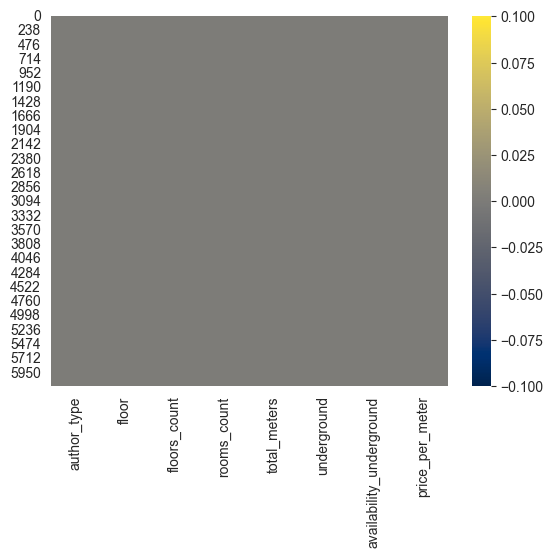

In [61]:
import pandas as pd
import seaborn as sns

path_base = "base.csv"
# path_base = 'result.csv'

df = pd.read_csv(path_base)
sns.heatmap(df.isnull(),cmap='cividis')

________________________________________________________________________________________________________________________________________________________________________________________________________

Поиск выбросов

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path_base = "base.csv"

df = pd.read_csv(path_base)

# Вычисление границ IQR
Q1, Q3 = df['price_per_meter'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR  

# Отсеивание выбросов
df_cleaned = df[(df['price_per_meter'] >= lower_bound) & (df['price_per_meter'] <= upper_bound)]

df_cleaned.to_csv( path_base, index=False, encoding='utf-8-sig')


__________________________________________________________________________________________________________________________________________________________________________________________________



<Axes: ylabel='Frequency'>

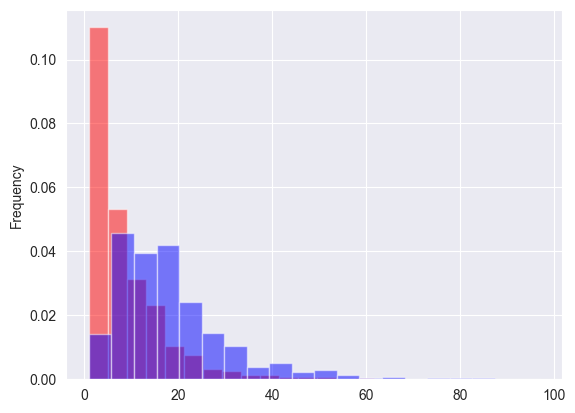

In [62]:
import pandas as pd

path_base = "base.csv"

df = pd.read_csv(path_base)
df.describe()


df.floor.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='r')
df.floors_count.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='b')

In [ ]:
import pandas as pd

path_base = "base.csv"
df = pd.read_csv(path_base)

df['author_type'].value_counts()

author_type
real_estate_agent           2993
developer                   2635
realtor                      294
homeowner                    127
representative_developer      67
unknown                       38
official_representative       14
Name: count, dtype: int64

C:\Users\Игорь.А\AppData\Local\Temp\ipykernel_18616\2574993243.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.countplot(x='author_type', hue='price', data=df,  color='pink')


<Axes: xlabel='author_type', ylabel='count'>

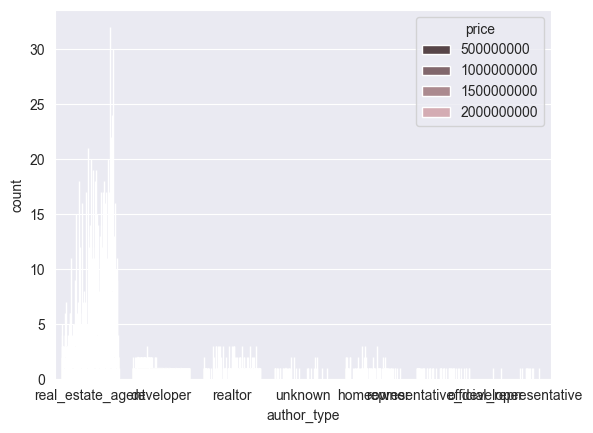

In [ ]:
import seaborn as sns

path_base = "base.csv"
df = pd.read_csv(path_base)

df['author_type'].value_counts()
sns.set_style("darkgrid")
sns.countplot(x='author_type', hue='price_per_meter', data=df,  color='pink') 

C:\Users\Игорь.А\AppData\Local\Temp\ipykernel_18616\1965480913.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived, color='r', kde=False, bins=np.arange(xmin, xmax, width)) #делаем диаграмку по выжившим пассажирам
C:\Users\Игорь.А\AppData\Local\Temp\ipykernel_18616\1965480913.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

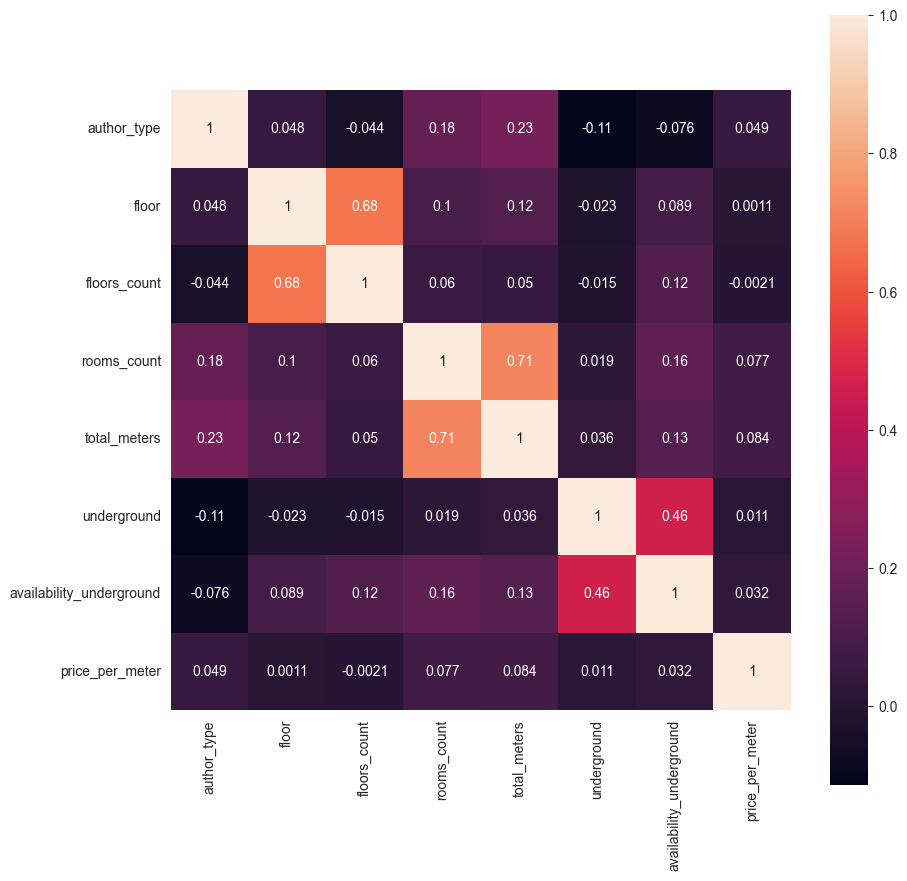

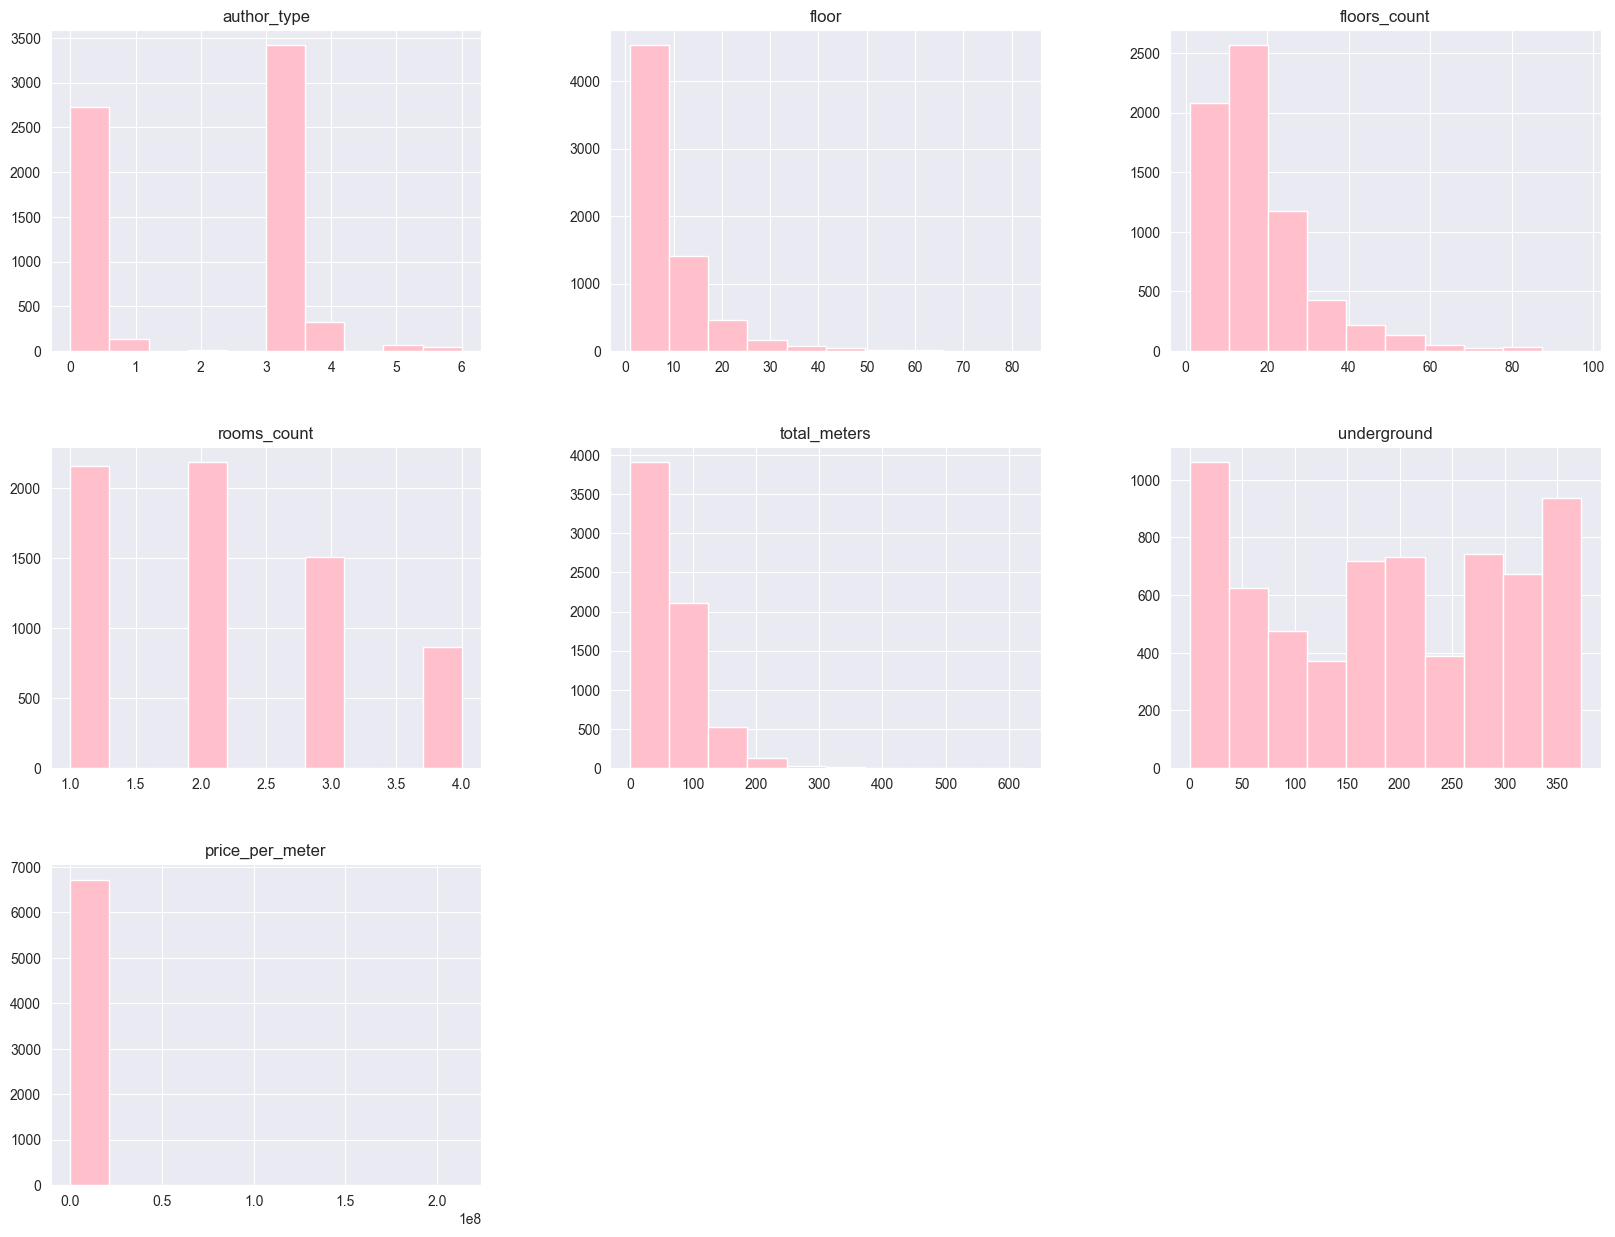

In [25]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#####################################################################################################################

path_base = "base.csv"
df = pd.read_csv(path_base)

#####################################################################################################################

def number_encode_features(init_df):
    result = init_df.copy() #копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() #для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) #применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

plt.subplots(figsize=(10,10))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True, annot=True)

encoded_data.hist(figsize=(20,15), color='pink') #смотрим на красивые диаграммы

#####################################################################################################################

died = list(encoded_data[encoded_data['author_type'] == 0]['price_per_meter'].dropna()) #создали переменную, которая содержит погибших пассажиров
survived = list(encoded_data[encoded_data['author_type'] == 1]['price_per_meter'].dropna()) #создали еще одну переменную, но уже для выживших
xmin = min(min(died), min(survived)) #переменная для хранения мин значения
xmax = max(max(died), max(survived)) #переменная для хранения макс значения
width = (xmax - xmin) / 20 #настройка ширины
sns.distplot(survived, color='r', kde=False, bins=np.arange(xmin, xmax, width)) #делаем диаграмку по выжившим пассажирам
sns.distplot(died, color='b', kde=False, bins=np.arange(xmin, xmax, width)) #делаем  2 диаграмку и накладываем
plt.legend(['не выжил', 'выжил']) #обозначим цвета
plt.title('Наложенная гистограмма для колонки {}'.format(['price_per_meter'])) #заголовок красивый
plt.show() #можно заметить, что люди с возрастом 20-30 выжило куда больше, чем погибло, но с детьми иная ситуация

#####################################################################################################################

# for i, col in enumerate(['Pclass', 'SibSp', 'Parch']): #цикл для колонок
#     plt.figure(i)
#     sns.catplot(x=col, y='Survived', data=df, kind='point', aspect=1.5, color='pink') #тут мы видим влияение класса пассажира, количество братьев и сестер, количество родителей и детей на выживаемость